# Kalp Hastalığı Analizi

## Data Hakkında Bilgiler


In [30]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



In [31]:
data = pd.read_csv("/content/drive/MyDrive/heart.csv")

In [32]:
data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Datasetimiz 14 columndan oluşmaktadır. Bu çalışmada yaş(age), cinsiyet(sex), göğüs ağrısı tipi(cp), kan basıncı(trestbps), kolestrol(chol) verileri kullanılarak hastanın kalp hastası(target) olup olmadığı tahmin edilecektir.

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Datamızda 1025 adet eksiksiz veri bulunmaktadır.

In [34]:
newdata=data.iloc[:,[0,1,2,3,4]]
target=data.iloc[:,-1]


Datamızdan kullanacağımız columnları yeni bir data haline getirdik ve sonuç datamızı da yeni bir data haline getirdik.

In [35]:
 
def dataoutliners(dataframe,percent,randomormax=True):
  columns=dataframe.describe().columns
  indexes=[]
  for i in columns:
    stats=list(dataframe[i].describe())
    inr=(float(stats[6])-float(stats[4]))*1.5
    upperq=list(dataframe[dataframe[i]>(float(stats[6])+inr)].index)
    lowerq=list(dataframe[dataframe[i]<(float(stats[4])-inr)].index)
    indexes=indexes+upperq+lowerq
  if randomormax:
    son=[]
    for z in Counter(indexes).most_common(int(len(dataframe)*percent/100)):
      son.append(z[0])
    return son
  else:
    return list(set(indexes))[int(len(dataframe)/percent)]
def dropit(dataframe,liste):
  for i in liste:
    dataframe.drop(i,inplace=True)
  return dataframe


Outlierları tespit eden fonksiyon yazdık. Fonksiyonumuz datadaki tüm columnları tek tek dolaşarak outlierları belirleyip en çok columnda outlier olan verileri çıkarmak üzere yazıldı.


In [36]:
liste=dataoutliners(newdata,10)
newdata=dropit(newdata,liste)
target=dropit(target,liste)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Fonksiyonumuzu çağırdık.

In [37]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 979 entries, 0 to 1024
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       979 non-null    int64
 1   sex       979 non-null    int64
 2   cp        979 non-null    int64
 3   trestbps  979 non-null    int64
 4   chol      979 non-null    int64
dtypes: int64(5)
memory usage: 45.9 KB


Fonksiyonumuz belirlediği 46 outlierı çıkardı.

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


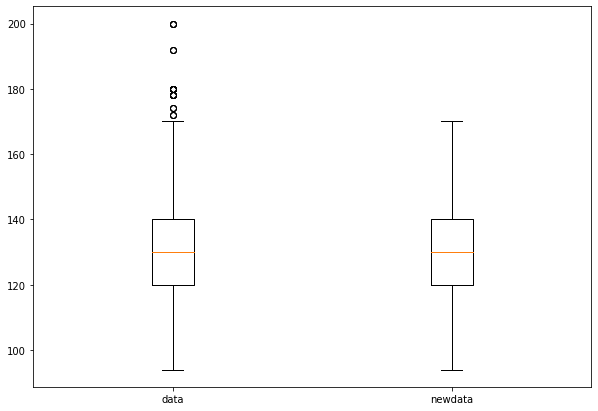

In [38]:
fig2 = plt.figure(figsize =(10, 7))
plt.boxplot([data.trestbps,newdata.trestbps])
plt.xticks([1, 2], ["data","newdata"])
plt.show()

Kan basıncı verilerinin eski ve yeni halini görüntülüyoruz.

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


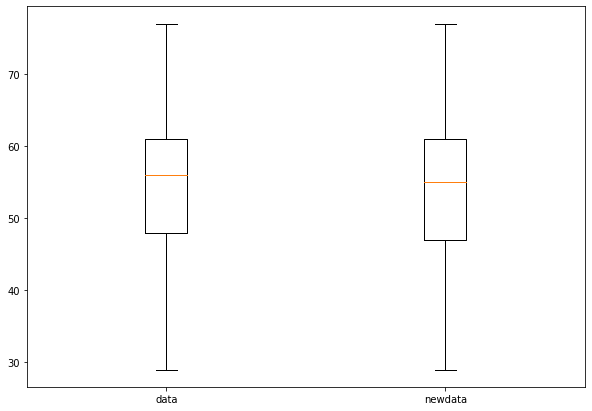

In [39]:
fig3 = plt.figure(figsize =(10, 7))
plt.boxplot([data.age,newdata.age])
plt.xticks([1, 2], ["data","newdata"])
plt.show()

Yaş verilerinin eski ve yeni halini görüntülüyoruz.

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


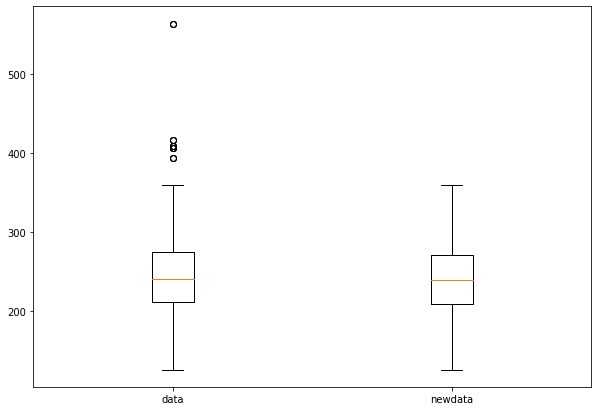

In [40]:
fig3 = plt.figure(figsize =(10, 7))
plt.boxplot([data.chol,newdata.chol])
plt.xticks([1, 2], ["data","newdata"])
plt.show()

Kolestrol verilerinin eski ve yeni halini görüntülüyoruz.

In [41]:
x_train, x_test, y_train, y_test = train_test_split(newdata,target, test_size=0.25, random_state=38)


Verimizi train ve test olarak ikiye ayırıyoruz.

In [42]:
x_train.info()
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 734 entries, 36 to 435
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       734 non-null    int64
 1   sex       734 non-null    int64
 2   cp        734 non-null    int64
 3   trestbps  734 non-null    int64
 4   chol      734 non-null    int64
dtypes: int64(5)
memory usage: 34.4 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 245 entries, 434 to 536
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       245 non-null    int64
 1   sex       245 non-null    int64
 2   cp        245 non-null    int64
 3   trestbps  245 non-null    int64
 4   chol      245 non-null    int64
dtypes: int64(5)
memory usage: 11.5 KB


Logistic Regression sonuçlarını görebilirsiniz.

In [43]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
acc_log_train = round(logreg.score(x_train, y_train)*100,2) 
acc_log_test = round(logreg.score(x_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_log_train))
print("Testing Accuracy: % {}".format(acc_log_test))

Training Accuracy: % 75.34
Testing Accuracy: % 75.1
